# 2022 빅콘테스트_spec+loan
## 우 걱정마세요

# 1. 라이브러리 및 패키지 불러오기

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 2. join(user_spec,loan_result)


In [ ]:
respec = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/respec_final.csv')

In [ ]:
loan_result = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/loan_result.csv')

In [ ]:
loan_train = loan_result[loan_result['is_applied']==1]

In [ ]:
loan_target = loan_result[loan_result['is_applied'] != 1]

In [ ]:
loan_target.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  1757
loan_rate                   1757
is_applied               3257239
dtype: int64

In [ ]:
loan_target = loan_target.dropna(subset = ['loan_limit', 'loan_rate'])

In [ ]:
loan = pd.concat([loan_target,loan_train])

In [ ]:
join = pd.merge(respec,loan ,on="application_id",how="right")

In [ ]:
join.isnull().sum()

application_id                               0
user_id                                    113
gender                                     113
insert_time                                113
yearly_income                              113
income_type                                113
employment_type                            113
houseown_type                              113
desired_amount                             113
purpose                                    113
personal_rehabilitation_yn                 113
personal_rehabilitation_complete_yn        113
existing_loan_cnt                          113
existing_loan_amt                          113
reage                                      113
career                                     113
credit_grade                               113
Labels                                     113
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit   

In [ ]:
sample = join[join['user_id'].isnull()]
sample['is_applied'].value_counts()

1.0    113
Name: is_applied, dtype: int64

In [ ]:
join = join.dropna(subset = ['gender'])

In [ ]:
join.isnull().sum()

application_id                               0
user_id                                      0
gender                                       0
insert_time                                  0
yearly_income                                0
income_type                                  0
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn                   0
personal_rehabilitation_complete_yn          0
existing_loan_cnt                            0
existing_loan_amt                            0
reage                                        0
career                                       0
credit_grade                                 0
Labels                                       0
loanapply_insert_time                        0
bank_id                                      0
product_id                                   0
loan_limit   

# 3. 전처리

In [ ]:
COLORS = sns.color_palette()

def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

## 1) loanapply_insert_time

In [ ]:
join.describe()

,application_id,user_id,gender,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,Labels,bank_id,product_id,loan_limit,loan_rate,is_applied
count,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.352549e+07,1.351987e+07,1.351987e+07,1.027001e+07
mean,1.083521e+06,4.406067e+05,6.873794e-01,4.805831e+07,5.187427e+07,4.120407e-01,7.069717e-01,2.897422e+00,6.200471e+07,3.574351e+01,5.296572e+00,4.628590e+00,2.892768e+00,3.260073e+01,1.464135e+02,2.274095e+07,1.275172e+01,5.456041e-02
std,6.260521e+05,2.538066e+05,4.635612e-01,1.335765e+08,2.317256e+08,4.922024e-01,4.551513e-01,3.159879e+00,8.938416e+07,1.027684e+01,5.386949e+00,1.837349e+00,3.268274e-01,1.725627e+01,7.865894e+01,7.221901e+07,3.843386e+00,2.271202e-01
min,1.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.500000e+00,0.000000e+00
25%,5.415640e+05,2.212370e+05,0.000000e+00,2.900000e+07,1.000000e+07,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+06,3.000000e+01,2.000000e+00,3.000000e+00,3.000000e+00,1.900000e+01,7.100000e+01,9.000000e+06,9.600000e+00,0.000000e+00
50%,1.083963e+06,4.409350e+05,1.000000e+00,3.600000e+07,2.800000e+07,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+07,3.000000e+01,3.000000e+00,5.000000e+00,3.000000e+00,3.400000e+01,1.500000e+02,1.800000e+07,1.320000e+01,0.000000e+00
75%,1.625316e+06,6.612410e+05,1.000000e+00,5.000000e+07,5.000000e+07,1.000000e+00,1.000000e+00,4.000000e+00,7.000000e+07,4.000000e+01,6.000000e+00,6.000000e+00,3.000000e+00,4.600000e+01,2.170000e+02,3.300000e+07,1.560000e+01,0.000000e+00
max,2.167826e+06,8.796970e+05,1.000000e+00,1.000000e+10,1.000000e+10,1.000000e+00,1.000000e+00,2.290000e+02,7.512000e+09,7.000000e+01,1.230000e+02,1.000000e+01,4.000000e+00,6.400000e+01,2.700000e+02,2.308000e+11,2.000000e+01,1.000000e+00


In [ ]:
#DateTime으로 인덱스 변경
join['loanapply_insert_time'] = pd.to_datetime(join['loanapply_insert_time'])

In [ ]:
sample1 = join[join['is_applied'] == 1]
sample1 = sample1.set_index(keys=['loanapply_insert_time'],inplace=False, drop=False)
sample1 = sample1.astype({'is_applied':int})

In [ ]:
# 대출 수를 하루 단위 구한다.
sample1 = sample1.resample('D').is_applied.count()
sample2 = pd.DataFrame(sample1)
sample2 = sample2.reset_index()

In [ ]:
sample2 = sample2.rename({'is_applied':'yes'}, axis = 1)

In [ ]:
sample2 = sample2.rename({'loanapply_insert_time':'Daytime'}, axis = 1)

In [ ]:
sample2

,Daytime,yes
0,2022-03-01,4489
1,2022-03-02,8023
2,2022-03-03,6570
3,2022-03-04,5986
4,2022-03-05,2501
...,...,...
87,2022-05-27,7442
88,2022-05-28,3143
89,2022-05-29,3042
90,2022-05-30,7662


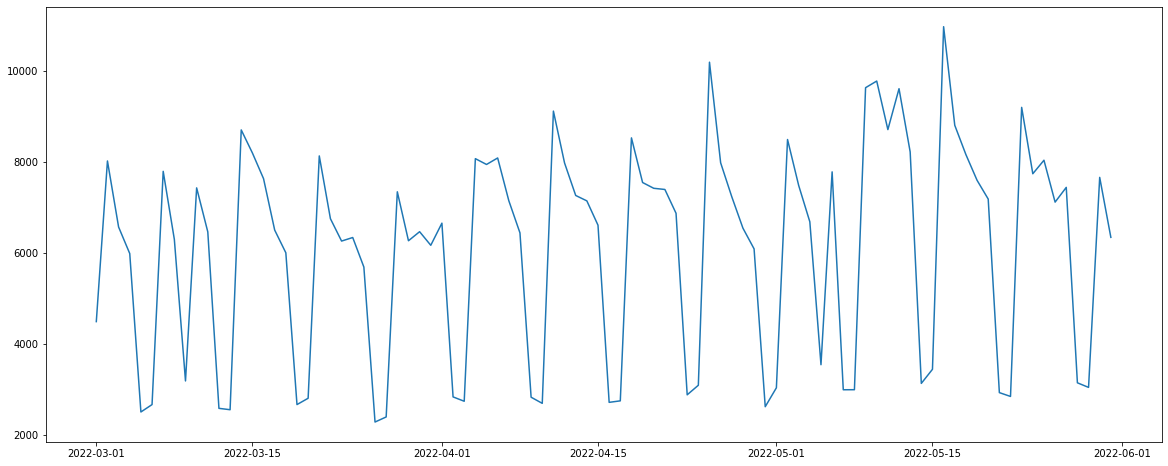

In [ ]:
#시각화
sample2_x = sample2['Daytime']
sample2_y = sample2['yes']

plt.figure(figsize=(20,8))
plt.plot(sample2_x, sample2_y)
plt.show()

In [ ]:
sample2 = sample2.astype({'yes':float})

In [ ]:
#구간별 이동평균
sample2['line'] = sample2['yes'].rolling(window=15).mean()

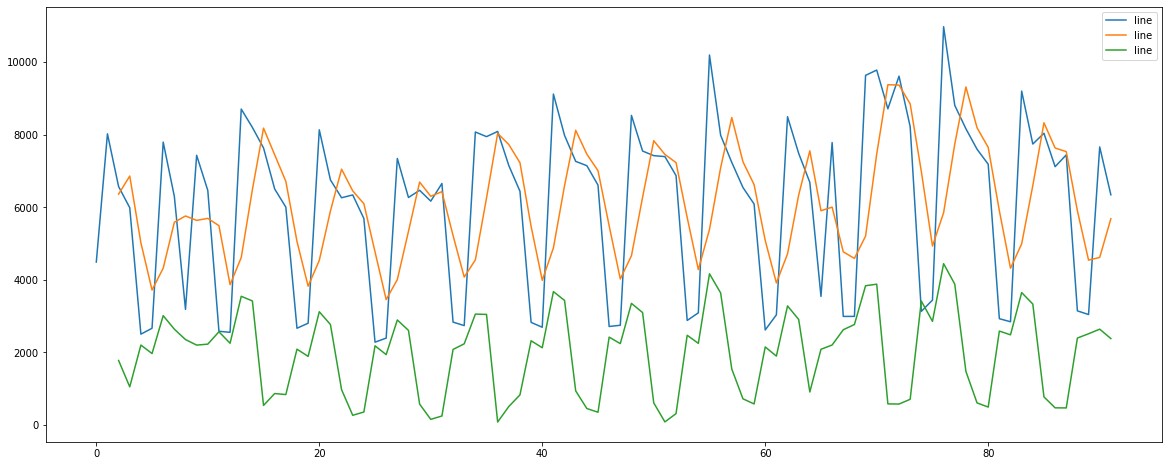

In [ ]:
plt.figure(figsize=(20,8))
sample2['yes'].plot(label='line', legend=True)
sample2['yes'].rolling(3).mean().plot(legend=True, label='line')
sample2['yes'].rolling(3).std().plot(legend=True, label='line')

In [ ]:
sample2['dayofweek'] = sample2['Daytime'].dt.dayofweek

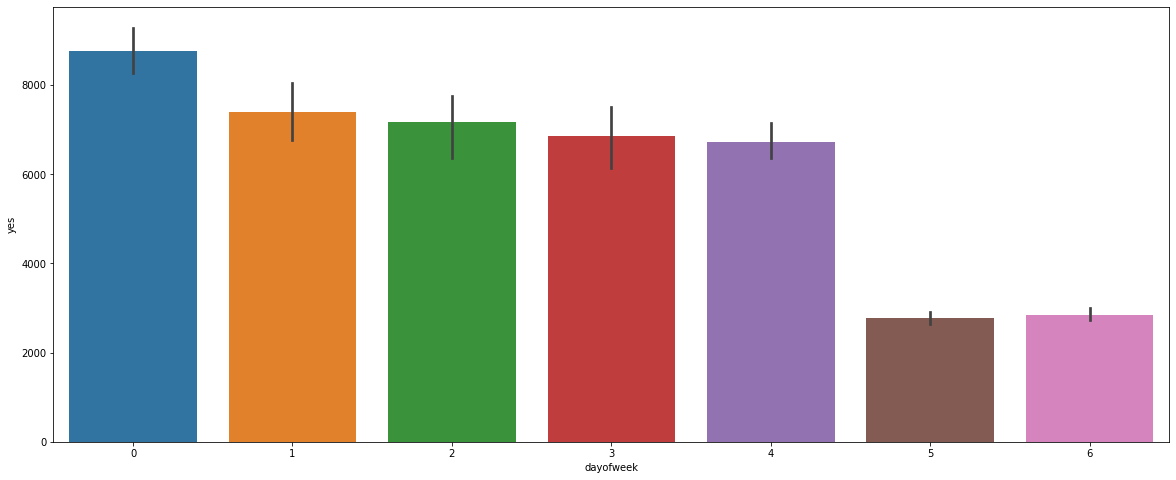

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x="dayofweek", y="yes", data=sample2)
plt.show()

## 2) 요일 추가

In [ ]:
# 요일별 대출 확인
# 0:월 ~
join_dow = join.set_index('loanapply_insert_time').groupby(lambda date:date.dayofweek).sum()['is_applied']
join_dow

loanapply_insert_time
0    113872.0
1    103623.0
2     93179.0
3     89116.0
4     87440.0
5     36084.0
6     37022.0
Name: is_applied, dtype: float64

In [ ]:
join['dow'] = join['loanapply_insert_time'].dt.weekday

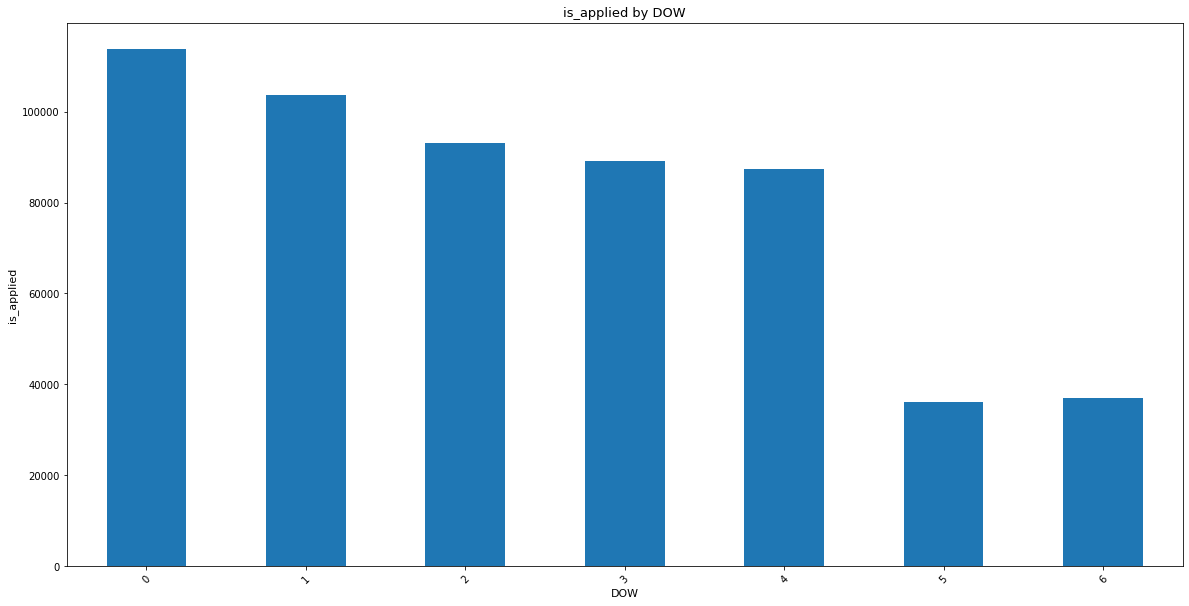

In [ ]:
plot_bar(join_dow, 'DOW', 'is_applied', 'is_applied by DOW')

In [ ]:
join.to_csv('/content/drive/MyDrive/2022_Bigcontest/Data/Preprocessing+loan.csv', index = False)